Kaggle spaceship titanic

https://www.kaggle.com/competitions/spaceship-titanic

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [249]:
num_cols = [
    'PassengerId',
    'Age',
    'RoomService', 
    'FoodCourt',
    'ShoppingMall',
    'Spa', 
    'VRDeck'
]

cat_cols = [
    'HomePlanet',
    'CryoSleep',
    'Cabin', 
    'Destination',
    'VIP',
    'Name'
]

feature_cols = num_cols + cat_cols

In [250]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# Исследуем датасет

Сначала посмотрим на датасет

In [251]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [252]:
data_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [253]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [254]:
data_train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


Для удобства заменим все NaN-ы

In [255]:
data_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Заменяем пропуски на наиболее частовстречающиеся значения.

In [256]:
for col in feature_cols:
  print(col)
  value = data_train[col].value_counts().idxmax()
  data_train[col].fillna(value, inplace=True)

  value = data_test[col].value_counts().idxmax()
  data_test[col].fillna(value, inplace=True)


data_train.isna().sum()

PassengerId
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

Разделим Cabin на несколько фичей

In [257]:
deck_list = list()
num_list = list()
side_list = list()

for cab in data_train['Cabin']:
  cab = str(cab)
  deck, num, side = cab.split('/')

  deck_list.append(deck)
  num_list.append(num)
  side_list.append(side)

# print(len(deck_list), len(num_list), len(num_list))

data_train.insert(loc=3, column='Deck', value=deck_list)
data_train.insert(loc=4, column='Num', value=num_list)
data_train.insert(loc=5, column='Side', value=side_list)

data_train = data_train.drop(columns=['Cabin'])

data_train.head()

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [258]:
deck_list = list()
num_list = list()
side_list = list()

for cab in data_test['Cabin']:
  cab = str(cab)
  deck, num, side = cab.split('/')

  deck_list.append(deck)
  num_list.append(num)
  side_list.append(side)

# print(len(deck_list), len(num_list), len(num_list))

data_test.insert(loc=3, column='Deck', value=deck_list)
data_test.insert(loc=4, column='Num', value=num_list)
data_test.insert(loc=5, column='Side', value=side_list)

data_test = data_test.drop(columns=['Cabin'])

data_test.head()

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G,3,S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F,4,S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C,0,S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C,1,S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F,5,S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [259]:
#removing and adding features in lists

cat_cols.remove('Cabin')

cat_cols.append('Deck')
cat_cols.append('Side')
num_cols.append('Num')



Переведем object во float

In [260]:
for col in num_cols:
  data_train[col] = data_train[col].apply(float)
  data_test[col] = data_test[col].apply(float)



Удалим колинки PassengerId, Name & Num

In [261]:
feature_drop = ['PassengerId', 'Num', 'Name']

data_train = data_train.drop(columns=feature_drop)
data_test = data_test.drop(columns=feature_drop)

cat_cols.remove('Name')
num_cols.remove('PassengerId')
num_cols.remove('Num')

feature_cols = cat_cols + num_cols

data_train.head()

,HomePlanet,CryoSleep,Deck,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [262]:
data_train

,HomePlanet,CryoSleep,Deck,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [263]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le1 = LabelEncoder()
le2 = LabelEncoder()

data_train['CryoSleep'] = le.fit_transform(data_train['CryoSleep'])
data_test['CryoSleep'] = le.fit_transform(data_test['CryoSleep'])

data_train['VIP'] = le1.fit_transform(data_train['VIP'])
data_test['VIP'] = le1.fit_transform(data_test['VIP'])

data_train['Transported'] = le2.fit_transform(data_train['Transported'])

data_train.head()


,HomePlanet,CryoSleep,Deck,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B,P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F,S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A,S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A,S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F,S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


Посмотрим на распределение числовыз признаков

In [264]:
# fig, ax = plt.subplots(len(num_cols), figsize=(30, 30))
# fig.suptitle('Распределения числвоых признаков')
# for i, col in enumerate(num_cols):
#   sns.histplot(data_train[col], ax = ax[i], kde=True).set(title=col)

Теперь для категореальных фич

In [265]:
len(cat_cols)

6

In [266]:
# plt.close()
# fig, ax = plt.subplots(3, 3, figsize=(20, 20))
# fig.suptitle('Распределения категориальных фич')

# for i, col in enumerate(cat_cols):
#   sns.countplot(data_train[col], ax=ax[i//3][i%3])

# plt.show()

Соотношение классов


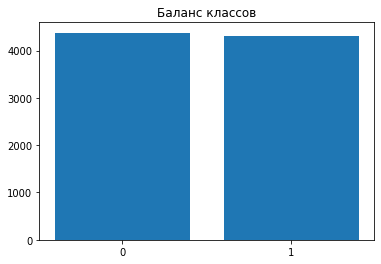

In [267]:
indexes = [0, 1]
counts = data_train['Transported'].value_counts().values

plt.title('Баланс классов')
plt.xticks(indexes)
plt.bar(indexes, counts)
plt.show()

Дисбаланса классов нет.

Посмотрим на корреляцию

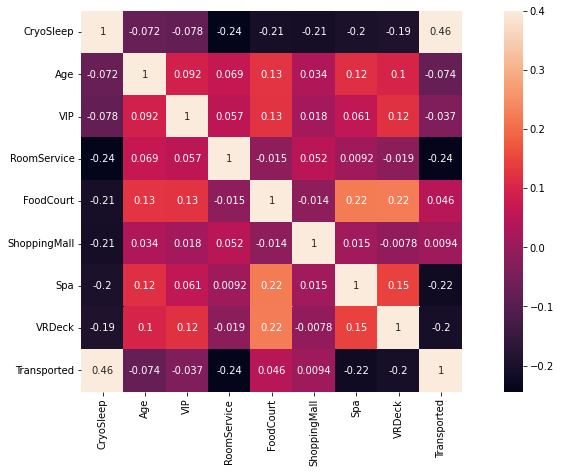

In [268]:
plt.figure(figsize=(15,7))
sns.heatmap(data_train.corr(), vmax=0.4, square=True, annot=True)

# Обучение

One-hot encoding

In [269]:
data_train

,HomePlanet,CryoSleep,Deck,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B,P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F,S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A,S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A,S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F,S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,A,P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,G,S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,G,S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,E,S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [270]:
dm = pd.get_dummies(data_train[cat_cols], drop_first=True)
X = pd.concat([data_train[num_cols], dm], axis=1).copy()

y = data_train['Transported'].copy()

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   CryoSleep                  8693 non-null   int64  
 7   VIP                        8693 non-null   int64  
 8   HomePlanet_Europa          8693 non-null   uint8  
 9   HomePlanet_Mars            8693 non-null   uint8  
 10  Destination_PSO J318.5-22  8693 non-null   uint8  
 11  Destination_TRAPPIST-1e    8693 non-null   uint8  
 12  Deck_B                     8693 non-null   uint8  
 13  Deck_C                     8693 non-null   uint8

Разобьем выборку на тренировочную и тестовоую

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score


In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [273]:
def print_score(model, _X, _y):
  score = round(model.score(_X, _y) * 100, 2)
  print(str(score) + ' percent')

### Logit

In [274]:
scale = StandardScaler()

X_train[num_cols] = scale.fit_transform(X_train[num_cols])
X_test[num_cols] = scale.fit_transform(X_test[num_cols])

In [275]:
logit = LogisticRegression(random_state=42)
logit.fit(X_train, y_train)
pred_logit = logit.predict(X_test)

print_score(logit, X_train, y_train)

print(f'roc_auc: {roc_auc_score(y_test, pred_logit)} ' +
      f'Accuracy: {accuracy_score(y_test, pred_logit)}')

79.29 percent
roc_auc: 0.7857261911376029 Accuracy: 0.7860839562967222


### Logit GridSearchCV

*Тут переобучение, надо подумать что можно сделать*

In [276]:
С = [100, 10, 1, 0.1, 0.01, 0.001]

grid = {
    'C': С
}

logit_gcv = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                         param_grid=grid, cv=3, scoring='roc_auc', 
                         n_jobs=-1)
logit_gcv.fit(X_train, y_train)
pred_lgcv = logit_gcv.predict(X_test)

print_score(logit_gcv, X_train, y_train)

print(f'roc_auc: {roc_auc_score(y_test, pred_lgcv)} ' +
      f'Accuracy: {accuracy_score(y_test, pred_lgcv)}')

88.1 percent
roc_auc: 0.78683141126888 Accuracy: 0.7872340425531915


### GNB

In [277]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)

print(f'roc_auc: {roc_auc_score(y_test, pred_gnb)} ' +
      f'Accuracy: {accuracy_score(y_test, pred_gnb)}')

roc_auc: 0.7157771992623929 Accuracy: 0.7176538240368028


In [278]:
logit_gcv.best_params_

{'C': 10}

### Decision tree

*Откуда 100%*

In [279]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
pred_dt = dec_tree.predict(X_test)

print_score(dec_tree, X_train, y_train)

print(f'roc_auc: {roc_auc_score(y_test, pred_dt)} ' +
      f'Accuracy: {accuracy_score(y_test, pred_dt)}')

94.74 percent
roc_auc: 0.7272348463803545 Accuracy: 0.7274295572167913


### Random forest

По заверению Юрия Яровикова из DLS это лучший бейзлайн для Кагла.

PS не обманул...

In [280]:
from scipy.sparse import rand
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
predict_rf = random_forest.predict(X_test)

print_score(random_forest, X_train, y_train)

print(f'roc_auc: {roc_auc_score(y_test, predict_rf)} ' +
      f'Accuracy: {accuracy_score(y_test, predict_rf)}')

94.74 percent
roc_auc: 0.7742096783154621 Accuracy: 0.7734330074755607


### Ensemble models

In [281]:
from sklearn.ensemble import VotingClassifier

model1 = RandomForestClassifier()
model2 = DecisionTreeClassifier()
model3 = LogisticRegression(C=10)

model = VotingClassifier(estimators=[('random_f', model1), ('dec_tree', model2), ('logit', model3)], voting='hard')
model.fit(X_train, y_train)

pred_ensb = model.predict(X_test)

print_score(model, X_train, y_train)

print(f'roc_auc: {roc_auc_score(y_test, pred_ensb)} ' +
      f'Accuracy: {accuracy_score(y_test, pred_ensb)}')

94.72 percent
roc_auc: 0.7857976236775059 Accuracy: 0.7855089131684876


# Построим матрицу ошибок

Accuracy: 94 % 



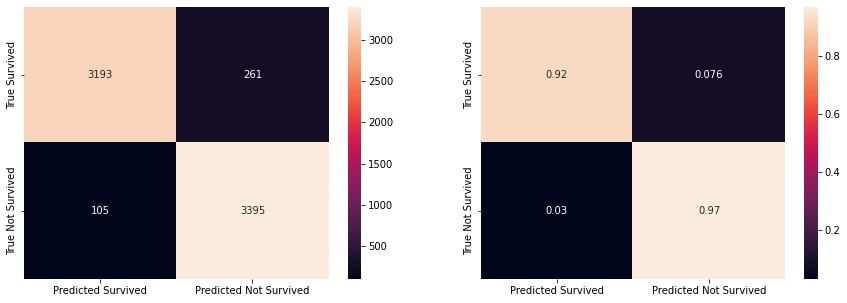

In [282]:
from sklearn.metrics import confusion_matrix
import itertools

rf_predict = random_forest.predict(X_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, rf_predict)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]


true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

# Gradient Boosting

In [283]:
%pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [284]:
from catboost import CatBoostClassifier

In [285]:
n_estimators = [200, 300, 400, 500]
lrs = [0.1]
max_depth = [3, 4, 6]

CB_classifier = CatBoostClassifier(loss_function='Logloss', 
                                   bootstrap_type = 'Bayesian',
                                   silent=True, task_type='GPU')

grid = {'n_estimators': n_estimators,
        'learning_rate': lrs,
        'max_depth': max_depth
        }

CB_gscv = GridSearchCV(estimator=CB_classifier, param_grid = grid, cv = 5, scoring='roc_auc')
CB_gscv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f5ad0087110>,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4, 6],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='roc_auc')

# Ответы

In [286]:
test_dm = pd.get_dummies(data_test[cat_cols], drop_first=True)
test_data = pd.concat([data_test[num_cols], test_dm], axis=1)


In [290]:
pred = model.predict(test_data).astype('bool')

submission = pd.read_csv('sample_submission.csv')

submission['Transported'] = pred
submission.to_csv('my_submission.csv', index=False)